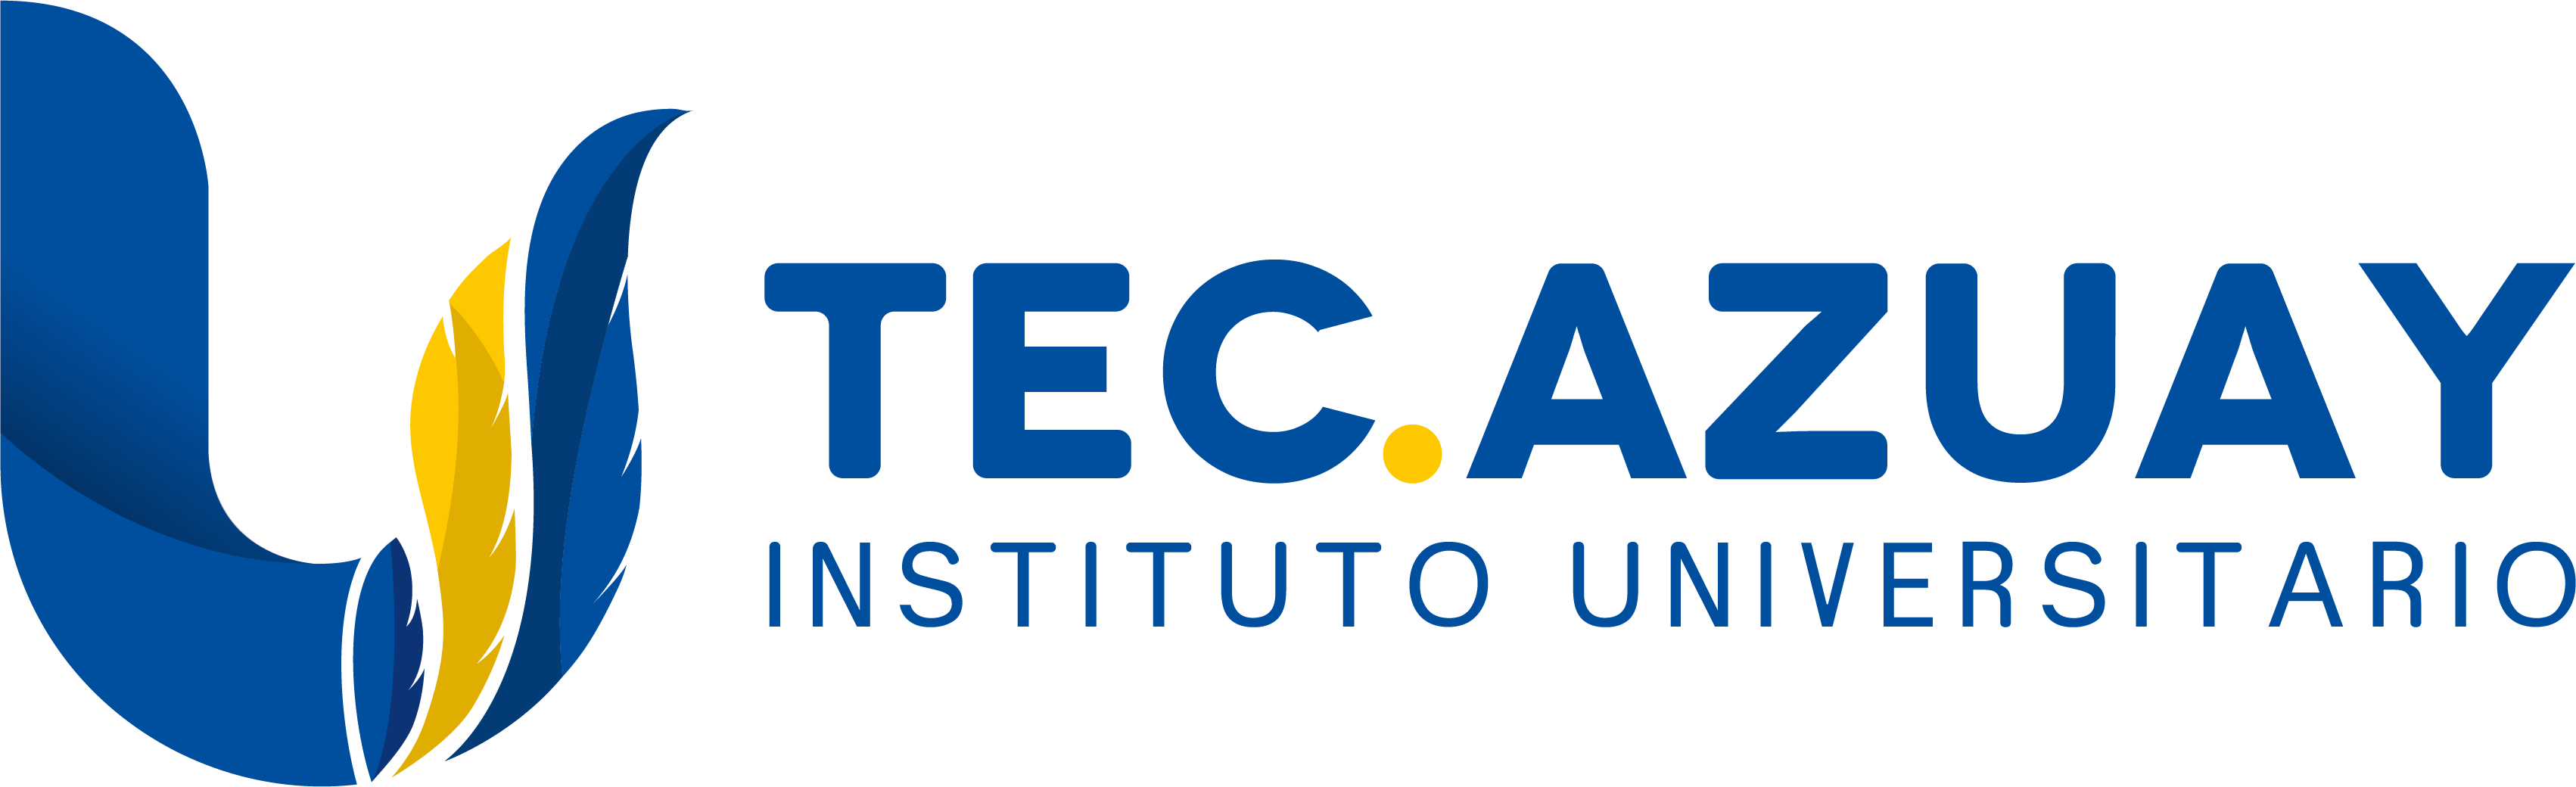

**Nombre:** Victor Cabrera

**Docente:** Ing.Veronica Chimbo

**Asignatura:** Marcos de referencia para big data

#   MLlib: La librería de aprendizaje automático escalable de Apache Spark

MLlib es la biblioteca de aprendizaje automático (Machine Learning) de Apache Spark. Está diseñada para ser escalable y eficiente, permitiendo realizar tareas de aprendizaje automático en grandes volúmenes de datos de manera distribuida.

## Características de MLlib:

### 1. Escalabilidad:

Puede manejar grandes volúmenes de datos distribuidos en clústeres, lo que la hace adecuada para big data.

### 2.Rendimiento:

Está optimizada para proporcionar un rendimiento rápido y eficiente, aprovechando el procesamiento en memoria de Spark.

### 3.Facilidad de uso:

Ofrece una API sencilla y consistente, disponible en múltiples lenguajes como Java, Scala, Python y R.

###  4.Interoperabilidad:

Puede integrarse fácilmente con otras bibliotecas de Spark, como Spark SQL y DataFrames, facilitando el preprocesamiento de datos y la manipulación de conjuntos de datos.

### 5.Amplitud de algoritmos:

Proporciona una amplia gama de algoritmos de aprendizaje automático, que incluyen clasificación, regresión, clustering, filtrado colaborativo y reducción de dimensionalidad.

## Componentes principales de MLlib:

### 1.Algoritmos de aprendizaje automático:

- Clasificación: Ejemplos incluyen la regresión logística y el árbol de decisión.
- Regresión: Ejemplos incluyen la regresión lineal y la regresión de árboles.
- Clustering: Ejemplo incluye k-means.
- Filtrado colaborativo: Ejemplo incluye la factorización de matrices para recomendaciones.

### 2.Pipelines:

- Permite crear flujos de trabajo de Machine Learning reutilizables y configurables, que incluyen etapas de preprocesamiento, transformación de datos y modelado.

### 3.Transformaciones y preprocesamiento de datos:

- Herramientas para normalización de datos, escalado, manejo de valores faltantes, codificación de variables categóricas, etc.

### 4.Evaluación de modelos:

- Métricas y herramientas para evaluar el rendimiento de los modelos, como precisión, recall, F1 score, entre otros.

### 5.Persistencia de modelos:

- Soporte para guardar y cargar modelos entrenados para reutilizarlos o para producción.

MLlib se destaca por su capacidad para manejar datos a gran escala y por su integración nativa con el ecosistema Spark, lo que facilita la creación de pipelines de datos y modelos de Machine Learning robustos y escalables


En este notebook aprenderemos a entrenar modelos de Machine Learning con Spark, utilizando la librería de MLlib

In [1]:
!pip install jupyter_contrib_nbextensions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 32.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.9/466.9 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.3 MB/s eta 0:00:00
  Created wheel for jupyter_contrib_nbextensions: filename=jupyter_contrib_nbextensions-0.7.0-py2.py3-none-any.whl size=23428780 sha256=4bf8bd00fe17f0597596618339638a0cd9c6891c2229e5000a2215e5bf920f71
  Stored in directory: /root/.cache/pip/wheels/ea/cc/7d/99ef154f984726b1201c0f72cfe9c9d7c5132c1a2ae4d8677f
  Created wheel for jupyter_contrib_core: filename=jupyter_contrib_core-0.4.2-py2.py3-none-any.whl size=17482 sha256=b90a5b7b75b233ccd304c6b3afb89254e82099b9ff30a9208a394a784d32a51a
  Stored in directory: /root/.cache/pip/wheels/a9/52/88/e0643cdfd68f0562087918c37dd583378648dbc3df68b907f7
Successfully built jupyter_contrib_nbextensions jupyter_contrib_core


#### Fase 1. Importación y análisis de datos

Pimero, instalemos cualquier dependencia necesaria y configuremos nuestro entorno Spark.

In [2]:
!pip install findspark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=96d4f5f89ef8efe4f21a411065de460004dba7ea19467adee5474523bf184675
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [3]:
import pyspark

In [4]:
import findspark
findspark.init()

import pandas as pd
import pyspark

In [5]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName('Datos estudiantes') \
    .getOrCreate()

In [6]:
spark

En este caso vamos a crear datos ficticios de notas de estudiantes con 100 registros

In [7]:
import pandas as pd
import numpy as np

# Definir el número de registros
num_records = 100

# Generar IDs de estudiantes y materias
np.random.seed(0)  # para reproducibilidad
id_estudiante = np.random.randint(1, 51, num_records)  # IDs de 1 a 50
id_materia = np.random.randint(1, 11, num_records)  # IDs de 1 a 10

# Generar datos de asistencia (0 o 1)
asistencia = np.random.randint(0, 2, num_records)

# Generar notas aleatorias entre 0 y 100
nota_diagnostico = np.random.uniform(0, 100, num_records).round(2)
nota_parcial = np.random.uniform(0, 100, num_records).round(2)
nota_final = np.random.uniform(0, 100, num_records).round(2)

# Crear el DataFrame de pandas
data = {
    'id_estudiante': id_estudiante,
    'id_materia': id_materia,
    'asistencia': asistencia,
    'nota_diagnostico': nota_diagnostico,
    'nota_parcial': nota_parcial,
    'nota_final': nota_final
}

df_pandas = pd.DataFrame(data)

# Convertir el DataFrame de pandas a un DataFrame de Spark
df = spark.createDataFrame(df_pandas)

# Mostrar el esquema del DataFrame de Spark
df.printSchema()

root
 |-- id_estudiante: long (nullable = true)
 |-- id_materia: long (nullable = true)
 |-- asistencia: long (nullable = true)
 |-- nota_diagnostico: double (nullable = true)
 |-- nota_parcial: double (nullable = true)
 |-- nota_final: double (nullable = true)



In [8]:
df.show(5)

+-------------+----------+----------+----------------+------------+----------+
|id_estudiante|id_materia|asistencia|nota_diagnostico|nota_parcial|nota_final|
+-------------+----------+----------+----------------+------------+----------+
|           45|         6|         0|           56.96|       40.11|     74.22|
|           48|        10|         1|           45.21|       12.07|      30.7|
|            1|         4|         1|           97.02|       98.07|     11.98|
|            4|         1|         1|           68.05|       40.61|     44.39|
|            4|         6|         1|            8.53|       56.92|     39.18|
+-------------+----------+----------+----------------+------------+----------+
only showing top 5 rows



In [9]:
df.toPandas().head()

,id_estudiante,id_materia,asistencia,nota_diagnostico,nota_parcial,nota_final
0,45,6,0,56.96,40.11,74.22
1,48,10,1,45.21,12.07,30.70
2,1,4,1,97.02,98.07,11.98
3,4,1,1,68.05,40.61,44.39
4,4,6,1,8.53,56.92,39.18


In [10]:
df.show(5)

+-------------+----------+----------+----------------+------------+----------+
|id_estudiante|id_materia|asistencia|nota_diagnostico|nota_parcial|nota_final|
+-------------+----------+----------+----------------+------------+----------+
|           45|         6|         0|           56.96|       40.11|     74.22|
|           48|        10|         1|           45.21|       12.07|      30.7|
|            1|         4|         1|           97.02|       98.07|     11.98|
|            4|         1|         1|           68.05|       40.61|     44.39|
|            4|         6|         1|            8.53|       56.92|     39.18|
+-------------+----------+----------+----------------+------------+----------+
only showing top 5 rows



In [11]:
df.count()

100

In [12]:
df.dtypes

[('id_estudiante', 'bigint'),
 ('id_materia', 'bigint'),
 ('asistencia', 'bigint'),
 ('nota_diagnostico', 'double'),
 ('nota_parcial', 'double'),
 ('nota_final', 'double')]

In [13]:
from pyspark.sql.types import StructField, StructType, IntegerType, DoubleType

In [14]:
# Definir el esquema
data_schema = [
    StructField('id_estudiante', IntegerType(), True),
    StructField('id_materia', IntegerType(), True),
    StructField('asistencia', IntegerType(), True),
    StructField('nota_diagnostico', DoubleType(), True),
    StructField('nota_parcial', DoubleType(), True),
    StructField('nota_final', DoubleType(), True),
]

final_struc = StructType(fields=data_schema)

# Definir el número de registros
num_records = 100

# Generar IDs de estudiantes y materias
np.random.seed(0)  # para reproducibilidad
id_estudiante = np.random.randint(1, 51, num_records)  # IDs de 1 a 50
id_materia = np.random.randint(1, 11, num_records)  # IDs de 1 a 10

# Generar datos de asistencia (0 o 1)
asistencia = np.random.randint(0, 2, num_records)

# Generar notas aleatorias entre 0 y 100
nota_diagnostico = np.random.uniform(0, 100, num_records).round(2)
nota_parcial = np.random.uniform(0, 100, num_records).round(2)
nota_final = np.random.uniform(0, 100, num_records).round(2)

# Crear el DataFrame de pandas
data = {
    'id_estudiante': id_estudiante,
    'id_materia': id_materia,
    'asistencia': asistencia,
    'nota_diagnostico': nota_diagnostico,
    'nota_parcial': nota_parcial,
    'nota_final': nota_final
}

df_pandas = pd.DataFrame(data)

# Convertir el DataFrame de pandas a un DataFrame de Spark
df = spark.createDataFrame(df_pandas, schema=final_struc)

In [15]:
df.printSchema()

root
 |-- id_estudiante: integer (nullable = true)
 |-- id_materia: integer (nullable = true)
 |-- asistencia: integer (nullable = true)
 |-- nota_diagnostico: double (nullable = true)
 |-- nota_parcial: double (nullable = true)
 |-- nota_final: double (nullable = true)



In [16]:
# Basics stats from our columns
df.describe().toPandas()

,summary,id_estudiante,id_materia,asistencia,nota_diagnostico,nota_parcial,nota_final
0,count,100,100,100,100,100,100
1,mean,23.5,5.4,0.58,52.93860000000001,49.3882,48.302700000000016
2,stddev,14.75900683746311,3.001683029585404,0.49604496374885826,28.414782111862944,28.910962912453336,27.48365412661706
3,min,1,1,0,0.01,0.97,1.93
4,max,50,10,1,98.5,99.24,98.16


In [17]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=fdb5a32f3132fe7b77264a5c8015c9c387f3eb6bb78f7bf305ddffbd08ce20da
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [18]:
from ydata_profiling import ProfileReport

df_pandas = df.toPandas()

pfr = ProfileReport(df_pandas)
#pfr.to_notebook_iframe()
pfr


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
pfr.to_file("data_estudiantes.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Fase 2. Pre-procesamiento de datos

In [20]:
from pyspark.sql.functions import col
# Seleccionar y convertir columnas
dataset = df.select(
    col('id_estudiante').cast('float'),
    col('id_materia').cast('float'),
    col('asistencia'),
    col('nota_diagnostico').cast('float'),
    col('nota_parcial').cast('float'),
    col('nota_final').cast('float')
)
dataset.show()

+-------------+----------+----------+----------------+------------+----------+
|id_estudiante|id_materia|asistencia|nota_diagnostico|nota_parcial|nota_final|
+-------------+----------+----------+----------------+------------+----------+
|         45.0|       6.0|         0|           56.96|       40.11|     74.22|
|         48.0|      10.0|         1|           45.21|       12.07|      30.7|
|          1.0|       4.0|         1|           97.02|       98.07|     11.98|
|          4.0|       1.0|         1|           68.05|       40.61|     44.39|
|          4.0|       6.0|         1|            8.53|       56.92|     39.18|
|         40.0|       1.0|         0|            5.64|       34.36|     53.18|
|         10.0|       2.0|         1|           48.78|       78.89|     84.54|
|         20.0|       3.0|         0|            88.1|       41.14|     53.63|
|         22.0|       5.0|         0|           97.64|       35.93|     68.03|
|         37.0|       3.0|         0|           61.7

In [21]:
from pyspark.sql.functions import isnull, when, count, col

dataset.select([count(when(isnull(c), c)).alias(c) for c in dataset.columns]).show()

+-------------+----------+----------+----------------+------------+----------+
|id_estudiante|id_materia|asistencia|nota_diagnostico|nota_parcial|nota_final|
+-------------+----------+----------+----------------+------------+----------+
|            0|         0|         0|               0|           0|         0|
+-------------+----------+----------+----------------+------------+----------+



In [22]:
# Drop missing values
dataset = dataset.replace('null', None)\
        .dropna(how='any')

In [23]:
dataset.show()

+-------------+----------+----------+----------------+------------+----------+
|id_estudiante|id_materia|asistencia|nota_diagnostico|nota_parcial|nota_final|
+-------------+----------+----------+----------------+------------+----------+
|         45.0|       6.0|         0|           56.96|       40.11|     74.22|
|         48.0|      10.0|         1|           45.21|       12.07|      30.7|
|          1.0|       4.0|         1|           97.02|       98.07|     11.98|
|          4.0|       1.0|         1|           68.05|       40.61|     44.39|
|          4.0|       6.0|         1|            8.53|       56.92|     39.18|
|         40.0|       1.0|         0|            5.64|       34.36|     53.18|
|         10.0|       2.0|         1|           48.78|       78.89|     84.54|
|         20.0|       3.0|         0|            88.1|       41.14|     53.63|
|         22.0|       5.0|         0|           97.64|       35.93|     68.03|
|         37.0|       3.0|         0|           61.7

In [24]:
dataset.dtypes

[('id_estudiante', 'float'),
 ('id_materia', 'float'),
 ('asistencia', 'int'),
 ('nota_diagnostico', 'float'),
 ('nota_parcial', 'float'),
 ('nota_final', 'float')]

In [25]:
from pyspark.ml.feature import VectorAssembler

# Seleccionar las columnas que deseas ensamblar
required_features = [
    'id_estudiante',
    'id_materia',
    'asistencia',
    'nota_diagnostico',
    'nota_parcial',
    'nota_final'
]

# Crear el VectorAssembler
assembler = VectorAssembler(inputCols=required_features, outputCol='features')

# Transformar los datos
transformed_data = assembler.transform(dataset)

In [26]:
transformed_data.show()

+-------------+----------+----------+----------------+------------+----------+--------------------+
|id_estudiante|id_materia|asistencia|nota_diagnostico|nota_parcial|nota_final|            features|
+-------------+----------+----------+----------------+------------+----------+--------------------+
|         45.0|       6.0|         0|           56.96|       40.11|     74.22|[45.0,6.0,0.0,56....|
|         48.0|      10.0|         1|           45.21|       12.07|      30.7|[48.0,10.0,1.0,45...|
|          1.0|       4.0|         1|           97.02|       98.07|     11.98|[1.0,4.0,1.0,97.0...|
|          4.0|       1.0|         1|           68.05|       40.61|     44.39|[4.0,1.0,1.0,68.0...|
|          4.0|       6.0|         1|            8.53|       56.92|     39.18|[4.0,6.0,1.0,8.52...|
|         40.0|       1.0|         0|            5.64|       34.36|     53.18|[40.0,1.0,0.0,5.6...|
|         10.0|       2.0|         1|           48.78|       78.89|     84.54|[10.0,2.0,1.0,48....|


In [27]:
transformed_data.head()

Row(id_estudiante=45.0, id_materia=6.0, asistencia=0, nota_diagnostico=56.959999084472656, nota_parcial=40.11000061035156, nota_final=74.22000122070312, features=DenseVector([45.0, 6.0, 0.0, 56.96, 40.11, 74.22]))

#### Fase 3. Entrenamiento del modelo


In [28]:
(training_data, test_data) = transformed_data.randomSplit([0.8,0.2])

In [29]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.sql.functions import col

# Crear una columna 'label' donde 1 significa que la 'nota_final' es >= 60 y 0 significa que es < 60
transformed_data = transformed_data.withColumn('label', (col('nota_final') >= 60).cast('float'))

# Configurar el RandomForestClassifier
rf = RandomForestClassifier(labelCol='label',  # Columna objetivo (etiqueta)
                            featuresCol='features',  # Columna de características
                            maxDepth=5)  # Profundidad máxima del árbol

In [30]:
model = rf.fit(transformed_data)

In [31]:
# Predict with the test dataset
predictions = model.transform(transformed_data)

#### Fase 4. Evaluación del modelo

In [32]:
# Evaluate our model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(
    labelCol='label',
    predictionCol='prediction',
    metricName='accuracy'
)

In [33]:
# Accuracy
accuracy = evaluator.evaluate(predictions)
print('Test Accuracy =', accuracy)

Test Accuracy = 1.0
